In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'JH'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

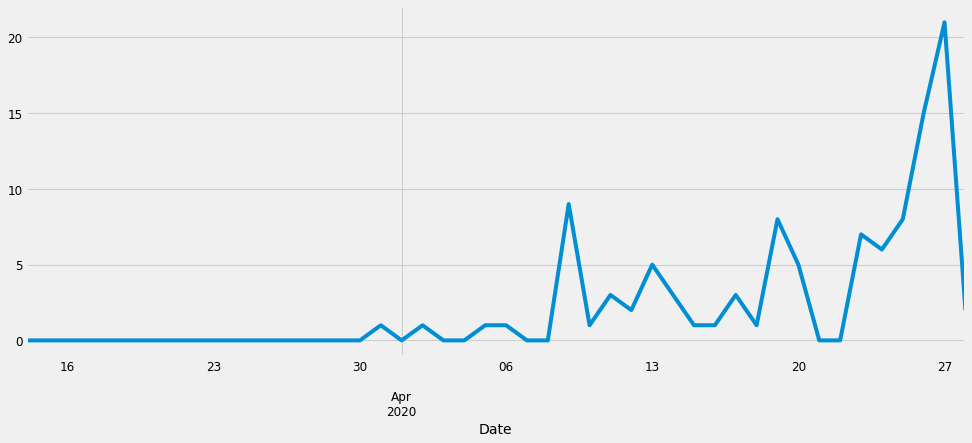

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

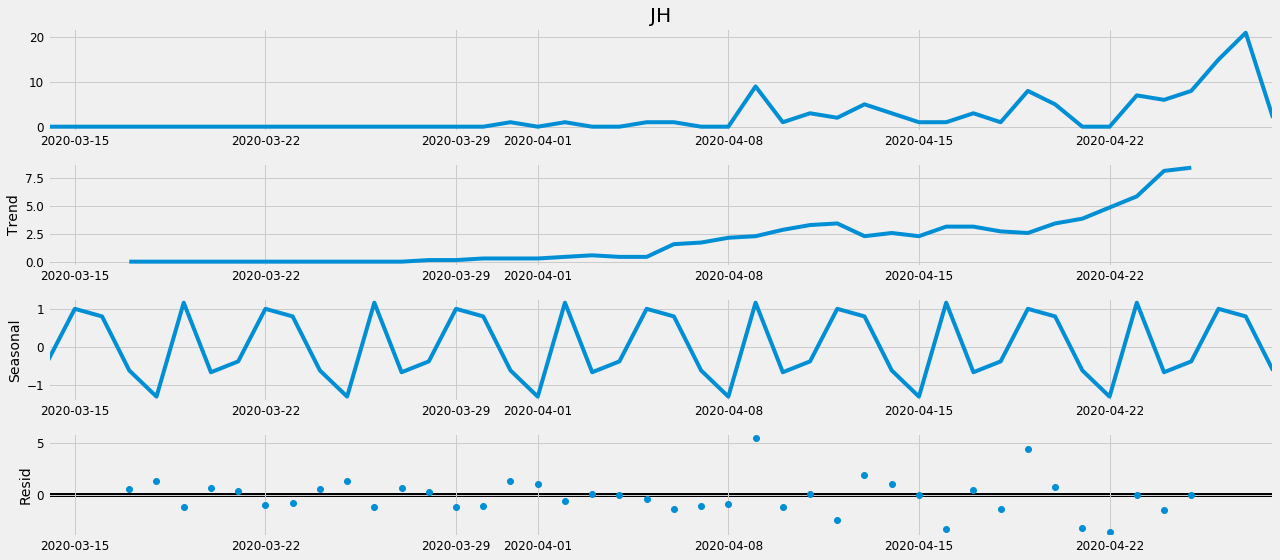

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:271.57758901652613
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1220.0497856637862


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:204.30126118189676
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:142.1338960974928
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:211.35272790851522


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1026.1144147052946
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:147.6882209046101
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:144.13252143368277
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:251.9627531644561


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1197.5503613538203
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:194.48636470549832
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:133.293157997621
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:204.72104706075345


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1239.5822247544802
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:145.0598035118293
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:135.12330491606457
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:252.45922975312473
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1269.4507841622906
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:204.66999070468142
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:135.71092316463805
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:200.457163259967
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1268.0779902664972
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:138.76641997101964
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:135.3237866310556
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:237.04301776746422


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1215.3013515672071
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:189.6089288551563
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:123.75605067841934
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:193.18582570240702


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1214.0277648655203
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:134.04591121716547
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:122.57062124115373
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:250.20022264279862
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1405.4152623471543


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:200.36880457817742
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:138.19898994967383
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:196.62744328293292
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1448.702126528211


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:136.6958375529759
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:138.69502290633045
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:238.06134706854627


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1173.6716276518328
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:196.48403183973844
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:134.85050642716948
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:190.55093696380285
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1215.7077675803262
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:133.4841334739018
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:129.90713907332608
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:249.03321456938974


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1315.6628052142325
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:203.23467749810158
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:135.68924312885815
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:191.41852620256597


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1314.2900137509735
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:129.49145515695173
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:131.35529020220312
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:238.80353867559435
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1093.8683734493743
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:190.9322960329465
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:125.14473230469417
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:190.14070481977262


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1070.7041099832434
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:130.527495223806
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:124.5270283236291


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2576      1.165      0.221      0.825      -2.025       2.540
ma.L1         -0.9321      1.169     -0.797      0.425      -3.224       1.359
ma.S.L12      -0.7888      1.660     -0.475      0.635      -4.043       2.466
sigma2        22.6742     29.265      0.775      0.438     -34.685      80.033


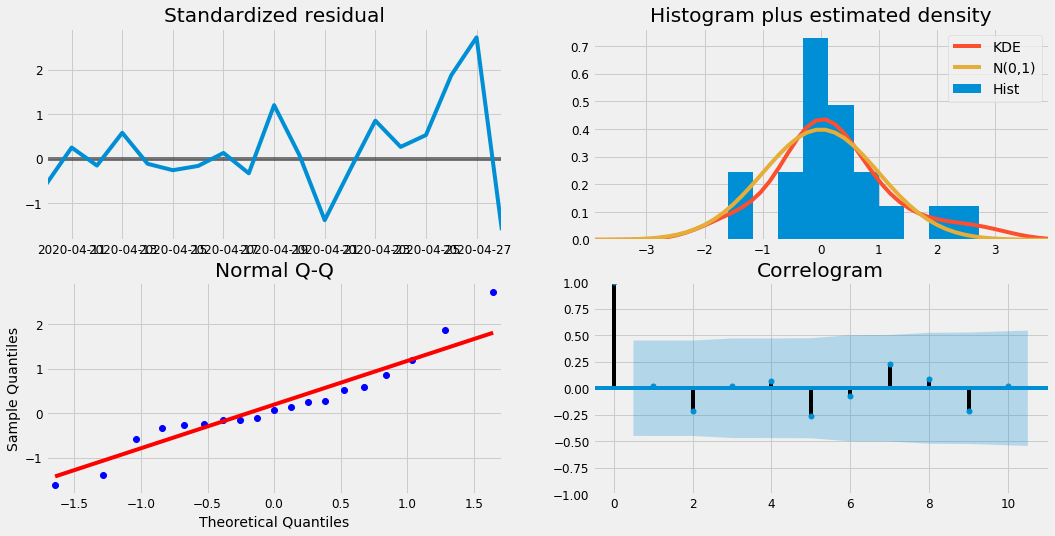

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

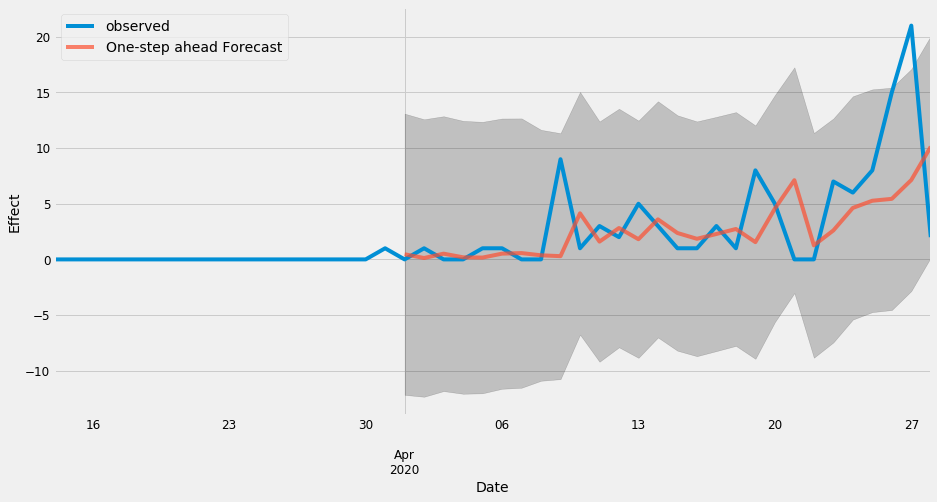

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 20.72


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 4.55


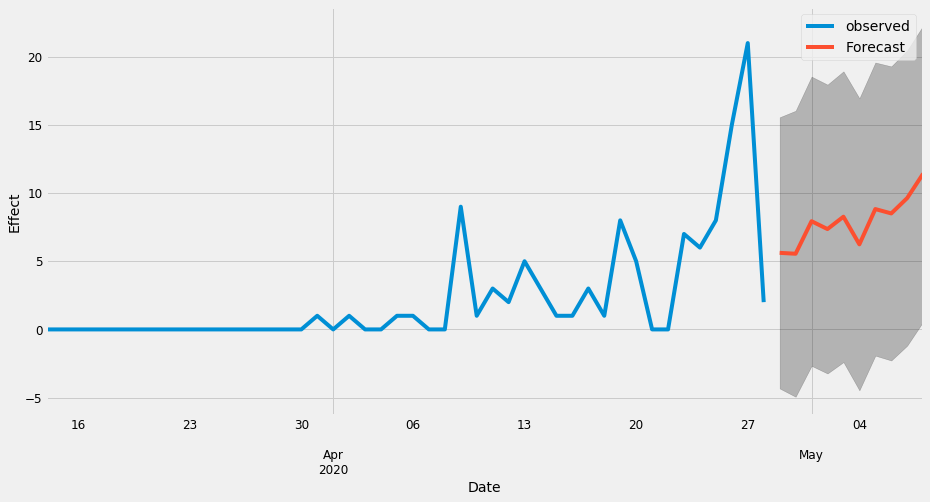

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,6,0
2020-04-25,8,0
2020-04-26,15,5
2020-04-27,21,4
2020-04-28,2,2


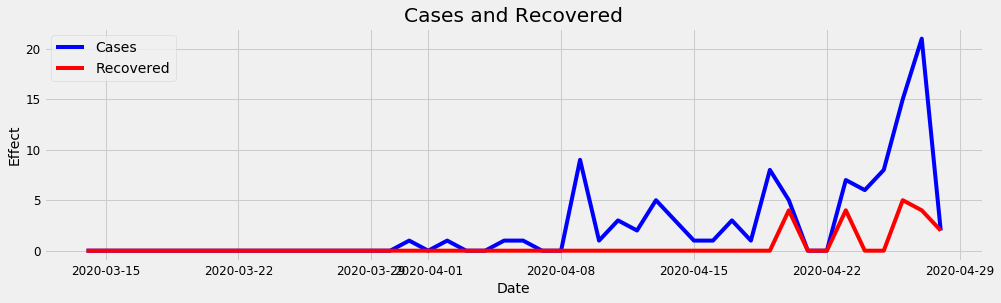

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

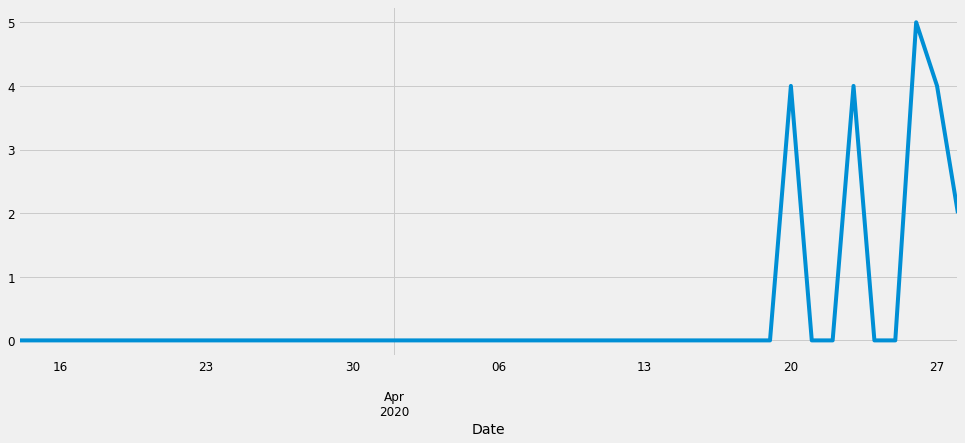

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

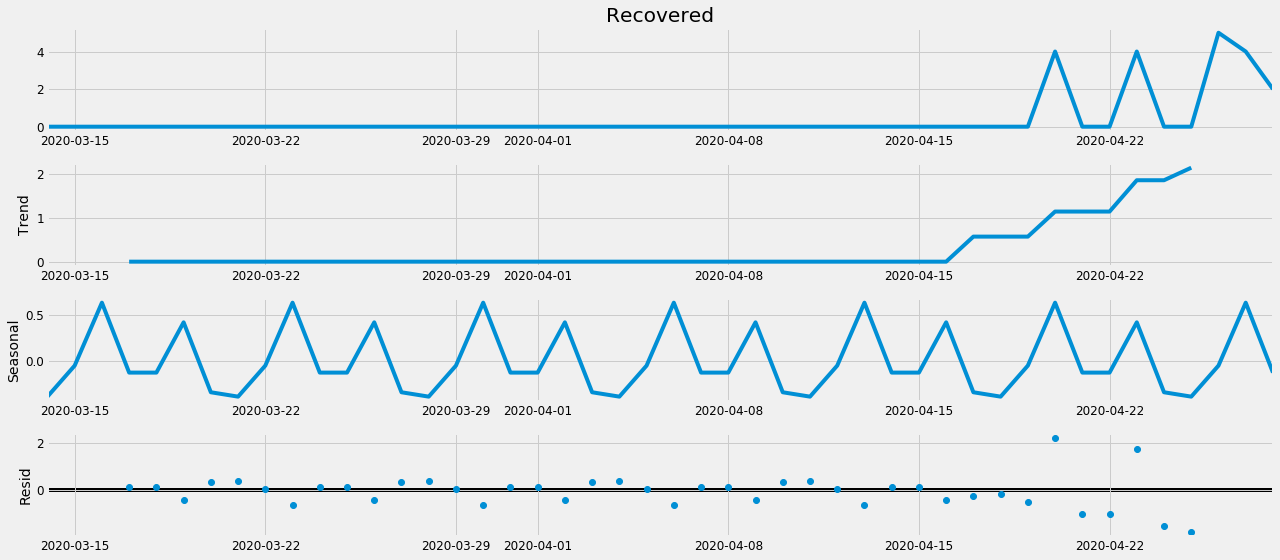

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:153.87589993505983
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:125.61077258984038
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:123.61077258498179
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:90.88036106151013
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:128.28094676399348
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:127.61077258984038
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:93.99408076790368
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:92.88036106151011
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:142.48777210080374
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:117.11865344853136
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:114.5111260903987
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:84.34589936021223
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:121.95495344159
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:119.11865344853136
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:90.08441273840795
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:86.34590382614238
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:160.26721745051083
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:129.29395026844617
AR

In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1263      0.411     -0.308      0.758      -0.931       0.679
ma.L1         -0.7236      0.455     -1.590      0.112      -1.616       0.168
ma.S.L12       0.0202   1.98e+04   1.02e-06      1.000   -3.89e+04    3.89e+04
sigma2         2.8591      0.950      3.010      0.003       0.997       4.721


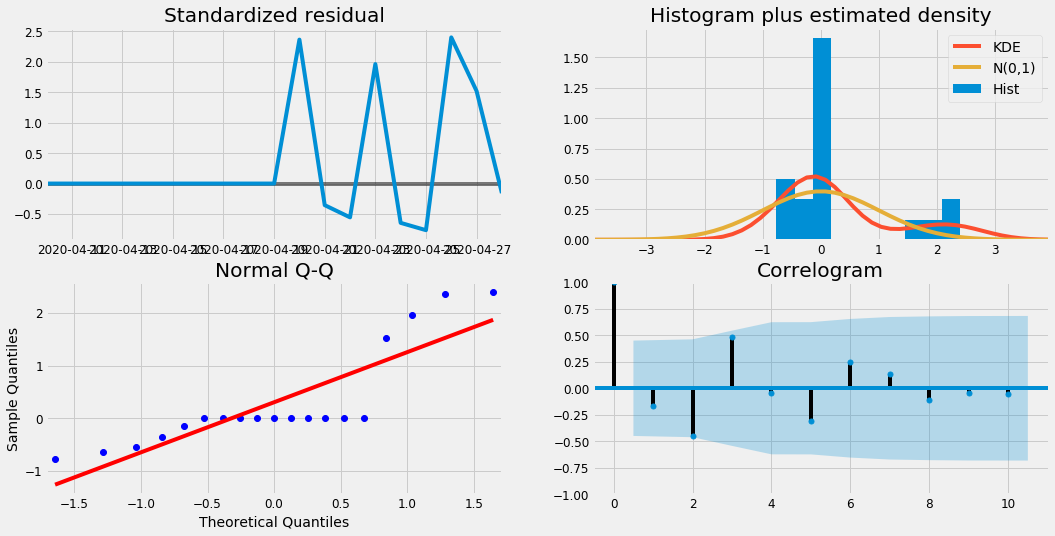

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

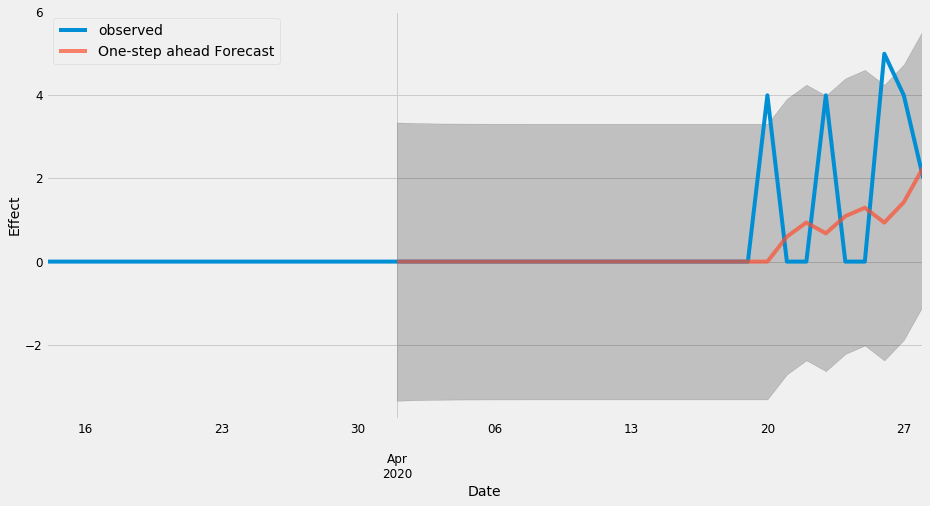

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 1.94


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 1.39


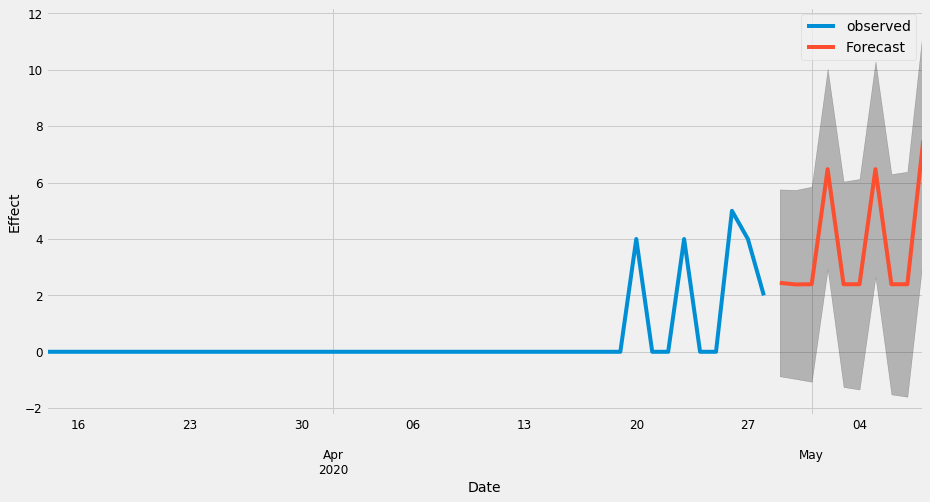

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

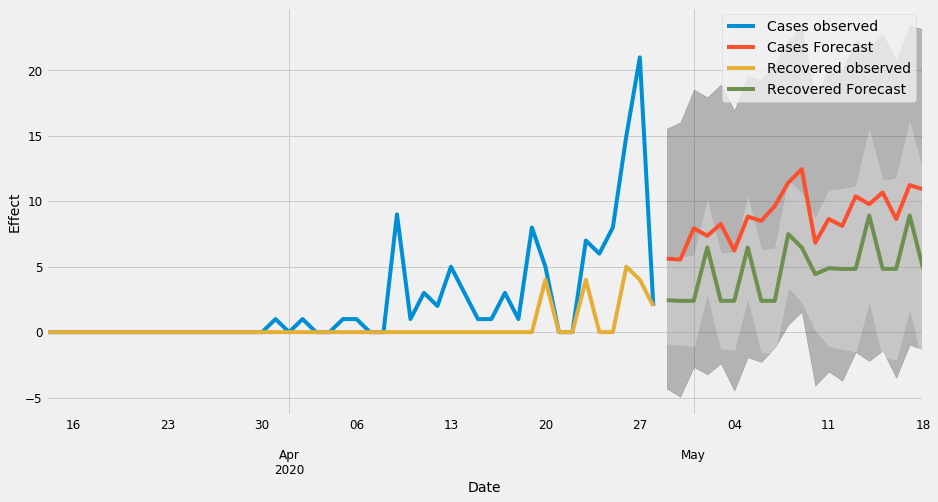

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=20)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=20)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

17

In [33]:
int(min(cases_result_date[0]))

5

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-29


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-25


In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-01


In [ ]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6

In [ ]:
sns.distplot(cases_result_date[0])
plt.show(block=True)

In [ ]:
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
sns.distplot(cases_result_date[0],color='red')
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
plt.bar([i for i in range(len(total_data['Cases']))], total_data['Cases'], align='center', alpha=0.5, color = 'black')
plt.bar([i for i in range(len(total_data['Recovered']))], total_data['Recovered'][0], align='center', alpha=0.5, color = 'blue')
plt.bar([i for i in range(len(cases_result_date))], cases_result_date[0], align='center', alpha=0.5, color = 'red')
plt.bar([i for i in range(len(recovered_result_date))], recovered_result_date[0], align='center', alpha=0.5, color='green')
plt.show()